In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
#!{sys.executable} -m pip install pandas-profiling

In [2]:
dat = pd.read_csv('../dat/online_shoppers_intention.csv.gz', compression='gzip')

In [3]:
dat.info() #12,330 and 18 columns
dat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dat)
#prof.to_notebook_iframe()
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

--of the 12,330 rows, 0.6% of data are duplicates - lets delete?
--14 numerical and 2 categorical and 2 boolean -- changing few columns to categorical in next step
--Features Administrative, Administrative_duration, Informational,Informational_duration, bounce rates, pagevalues and SpecialDay have predominant portion of zeroes
--Dependent var 'Revenue' is highly imbalanced (85% not purchased)
--Outlier bounce rate (0.2)
--Revenue and pageValues are correlated
--High correlation between administrative & productRelated, adminstrative_duration & information_duration, bounce & exit rates

In [5]:
#lets delete the duplicate rows
dat.drop_duplicates(keep=False, inplace=True)


In [6]:
#convert data to appropriate datatype
dat['OperatingSystems']  =dat['OperatingSystems'].astype('string',copy=False)
dat['Browser']  =dat['Browser'].astype('string',copy=False)
dat['Region']  =dat['Region'].astype('category',copy=False)
dat['TrafficType']  =dat['TrafficType'].astype('category',copy=False)

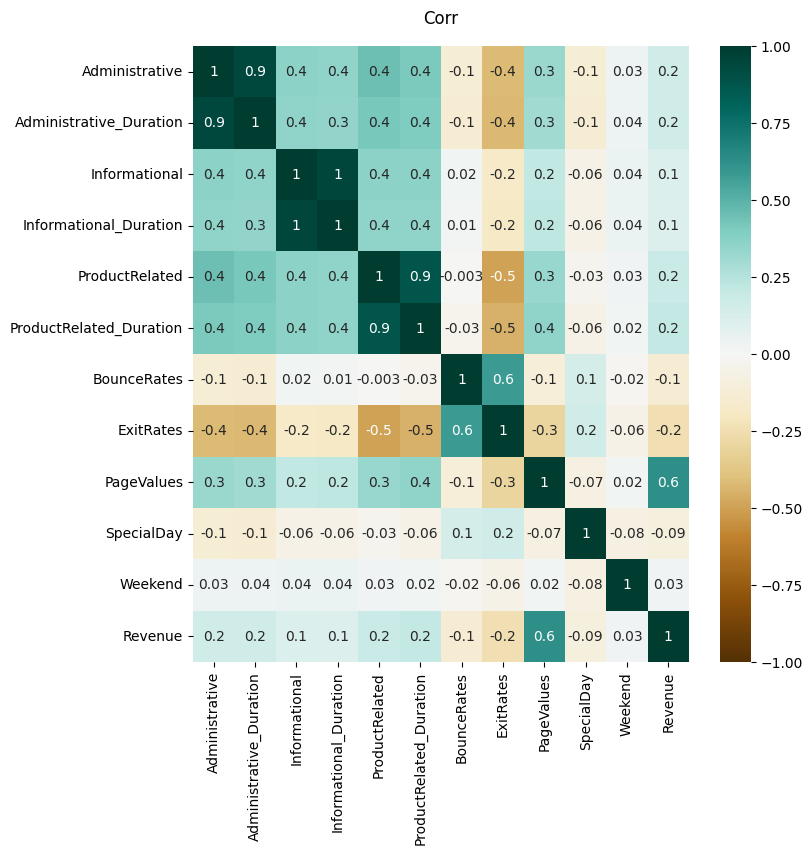

In [7]:
import seaborn as sns
plt.figure(figsize=(8, 8))
corr = dat.corr(method='spearman')
heatmap = sns.heatmap(corr,vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
heatmap.set_title('Corr', fontdict={'fontsize':12}, pad=16);
plt.show()


By virtue of how these metrics are calculated - bounce rates and exit rates would be highly correlated as bounce rate caters to visitors who left the site post that 1 page visit only while exit rates could indicate problems with downstream user funnel journey.


In [8]:
dat.describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000,12129.000000
mean,2.353533,82.157925,0.511914,35.043669,32.239756,1214.545378,0.019245,0.040472,5.986854,0.062215
std,3.335689,177.929019,1.278969,141.840277,44.665453,1923.219818,0.043098,0.044563,18.706061,0.200060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,198.700000,0.000000,0.014086,0.000000,0.000000
50%,1.000000,10.000000,0.000000,0.000000,18.000000,616.500000,0.002778,0.025000,0.000000,0.000000
75%,4.000000,95.500000,0.000000,0.000000,38.000000,1484.000000,0.015819,0.047500,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Though 86% of customers are returning customers, the mean conversion was higher among 'new visitors' with mean conversion rates being higher on weekends vs weekdays

In [9]:
dat.groupby('Weekend')['Revenue'].mean()
dat.groupby('VisitorType')['Revenue'].mean()

VisitorType
New_Visitor          0.249409
Other                0.200000
Returning_Visitor    0.141933
Name: Revenue, dtype: float64

In [10]:
dat.groupby('Month')['Revenue'].mean()


Month
Aug     0.175520
Dec     0.127660
Feb     0.016760
Jul     0.152778
June    0.102473
Mar     0.104518
May     0.110372
Nov     0.255978
Oct     0.209472
Sep     0.191964
Name: Revenue, dtype: float64

In [11]:
dat.groupby('SpecialDay')['Revenue'].mean()

SpecialDay
0.0    0.168260
0.2    0.078652
0.4    0.053498
0.6    0.083095
0.8    0.034056
1.0    0.064935
Name: Revenue, dtype: float64

As shown in graph below, about two-thirds of data from May, November & March months only, while months January & April are not represented in the dataset at all.
Biased, non-representative sample

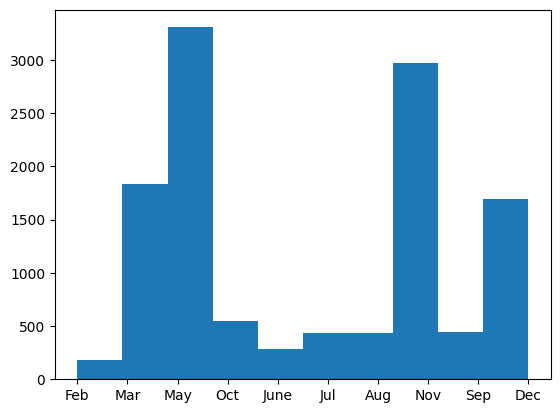

In [12]:
plt.hist(dat['Month'])
plt.show()

In [13]:
#Train/test split
#months of June—December as training set, and those corresponding to February—March as test set.
X_train = dat[dat.Month.isin(['June','Jul','Aug','Sep','Oct','Nov','Dec'])]
X_test = dat[dat.Month.isin(["Feb","Mar"])]

y_train = X_train.pop('Revenue')
y_test = X_test.pop('Revenue')

print('len of Train\n',len(X_train),
      'len of test',len(X_test))


len of Train
 6806 len of test 2016


lets bin the infrequent categories into 'other' bucket

In [15]:
X_train.OperatingSystems.value_counts()

v = X_train.OperatingSystems.value_counts() <100
#X_train.OperatingSystems = X_train.OperatingSystems.cat.add_categories('others')
X_train.loc[X_train.OperatingSystems.isin(v.index[v]), 'OperatingSystems'] = '99'
X_train.OperatingSystems.value_counts()

2     3524
1     1501
3     1420
4      271
99      90
Name: OperatingSystems, dtype: Int64

In [16]:
#X_train.Browser.value_counts()

v = X_train.Browser.value_counts() <100
#X_train.Browser = X_train.Browser.cat.add_categories('others')
X_train.loc[X_train.Browser.isin(v.index[v]), 'Browser'] = '99'
X_train.Browser.value_counts()

2     4429
1     1400
99     396
4      347
5      234
Name: Browser, dtype: Int64

In [17]:
#Repeat operation for X_test
X_test.OperatingSystems.value_counts()

v = X_test.OperatingSystems.value_counts() <100
#X_test.OperatingSystems = X_test.OperatingSystems.cat.add_categories('others')
X_test.loc[X_test.OperatingSystems.isin(v.index[v]), 'OperatingSystems'] = '99'
X_test.OperatingSystems.value_counts()

2     1119
1      422
3      394
99      81
Name: OperatingSystems, dtype: Int64

In [18]:
#Repeat operation for X_test
X_test.Browser.value_counts()

v = X_test.Browser.value_counts() <100
#X_test.OperatingSystems = X_test.OperatingSystems.cat.add_categories('others')
X_test.loc[X_test.Browser.isin(v.index[v]), 'Browser'] = '99'
X_test.Browser.value_counts()

2     1255
1      414
99     190
4      157
Name: Browser, dtype: Int64

In [19]:
#Fit a logistic regression
#step1: lets build pipeline
#since our dependent var is imbalanced runnign smote

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


numeric_features = ['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','PageValues','SpecialDay','BounceRates','ExitRates']
numeric_transformer = Pipeline(steps=[
    ("scaler",MinMaxScaler())
])
categorical_features = ['VisitorType', 'TrafficType', 'Region', 'Browser', 'OperatingSystems', 'Month']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [20]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LogisticRegression(max_iter=3000,class_weight='balanced'))]
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'PageValues', 'SpecialDay',
                                                   'BounceRates',
                                                   'ExitRates']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VisitorType', 'TrafficType',
                                                   'Region', 'Browser',
                                                   'OperatingSystems',
                                                   'Month'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=3000))])

In [21]:
lr_pred = model.predict(X_test)
print("model score: %.3f" % model.score(X_test, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred, target_names=['0', '1']))

model score: 0.918
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1821
           1       0.55      0.78      0.65       195

    accuracy                           0.92      2016
   macro avg       0.76      0.86      0.80      2016
weighted avg       0.93      0.92      0.92      2016



#Interpretation of results
The overall model accuracy is 93%-and the model has good precision for class 0 (98%), that is of all the records classified as -non-purchasers, they indeed did not generate revenue and 93% recall - of all the records that did not generate revenue, 93% were accurately captured. The model however does not do quite so well for the under-represented class 1, with a precision of 55% and poor recall of 78% -  missing signal on what qualifies to be a purchaser.

#Second classifier -random forest classifier


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,class_weight='balanced')

preprocessor2 = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)
    ]
)
Param = {}
model2 = Pipeline(
    steps=[("preprocessor", preprocessor2), ("model", rfc)]
)
#Train the model using the training sets y_pred=clf.predict(X_test)
model2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VisitorType', 'TrafficType',
                                                   'Region', 'Browser',
                                                   'OperatingSystems',
                                                   'Month'])])),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [23]:
rfc_pred = model2.predict(X_test)
print("Random forest classifier score: %.3f" % model2.score(X_test, y_test))
print(classification_report(y_test, rfc_pred, target_names=['0', '1']))


Random forest classifier score: 0.887
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1821
           1       0.08      0.02      0.03       195

    accuracy                           0.89      2016
   macro avg       0.49      0.50      0.48      2016
weighted avg       0.82      0.89      0.85      2016



In [24]:
#how many counts of true vs false were returned by logistic regression model
np.unique(lr_pred, return_counts=True)

(array([False,  True]), array([1739,  277]))

In [25]:
#how many counts of true vs false were returned by random forest classifier
np.unique(rfc_pred, return_counts=True)

(array([False,  True]), array([1978,   38]))

In [26]:
y_test.value_counts()


False    1821
True      195
Name: Revenue, dtype: int64

#Third classifier -random forest classifier with grid search
In this iteration, we use grid search to find the optimum hyperparameters for our random forest classifier.

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "model__n_estimators": [100, 500, 1000],
    "model__max_depth": [1, 5, 10, 25],
    "model__max_features": [*np.arange(0.1, 1.1, 0.1)],
}
model3 = Pipeline(
    steps=[("preprocessor", preprocessor2), ("model", rfc)]
)
# Perform grid search, fit it, and print score
gs = GridSearchCV(model3, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1000)
grid_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 5/5; 1/120] START model__max_depth=1, model__max_features=0.1, model__n_estimators=100
[CV 5/5; 1/120] END model__max_depth=1, model__max_features=0.1, model__n_estimators=100;, score=0.555 total time=   0.7s
[CV 3/5; 3/120] START model__max_depth=1, model__max_features=0.1, model__n_estimators=1000
[CV 3/5; 3/120] END model__max_depth=1, model__max_features=0.1, model__n_estimators=1000;, score=0.587 total time=   3.0s
[CV 5/5; 5/120] START model__max_depth=1, model__max_features=0.2, model__n_estimators=500
[CV 5/5; 5/120] END model__max_depth=1, model__max_features=0.2, model__n_estimators=500;, score=0.518 total time=   1.5s
[CV 4/5; 7/120] START model__max_depth=1, model__max_features=0.30000000000000004, model__n_estimators=100
[CV 4/5; 7/120] END model__max_depth=1, model__max_features=0.30000000000000004, model__n_estimators=100;, score=0.541 total time=   0.3s
[CV 2/5; 8/120] START model__max_depth=1, model__ma

/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [28]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
#results_df

Best: [0.62061583 0.58859006 0.5997553  0.56992429 0.5819708  0.58373238
 0.55816391 0.59372136 0.58417269 0.56903374 0.57211971 0.58123055
 0.5608045  0.56124535 0.6004812  0.50246504 0.58446357 0.55066489
 0.50951868 0.5049632  0.51598451 0.52186254 0.49467665 0.49320714
 0.49320714 0.49320714 0.49320714 0.49320714 0.49320714 0.49320714
 0.60386809 0.61283079 0.61033241 0.59725196 0.59563614 0.59607764
 0.59387187 0.58549697 0.58593804 0.58388105 0.57844344 0.57947178
 0.57682526 0.57653308 0.57432871 0.5777088  0.57300605 0.57506239
 0.57579811 0.57579757 0.57535737 0.57770837 0.57873681 0.57623886
 0.57991349 0.57844258 0.57756109 0.57462326 0.57726762 0.57785532
 0.64089331 0.64074755 0.63971803 0.62987287 0.63281102 0.63589677
 0.63325252 0.63663174 0.63325263 0.62972538 0.6358971  0.63604426
 0.63119543 0.63178291 0.63428031 0.63090099 0.63104901 0.63354653
 0.6360434  0.63222408 0.6344278  0.63251852 0.63134259 0.63339882
 0.63016688 0.62869834 0.62957962 0.62899224 0.6282576  

In [29]:
best_clf = grid_results.best_estimator_
gs_pred = best_clf.predict(X_test)
print(classification_report(y_test, gs_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1821
           1       0.09      0.02      0.03       195

    accuracy                           0.89      2016
   macro avg       0.50      0.50      0.49      2016
weighted avg       0.82      0.89      0.85      2016



#What are my most important features?


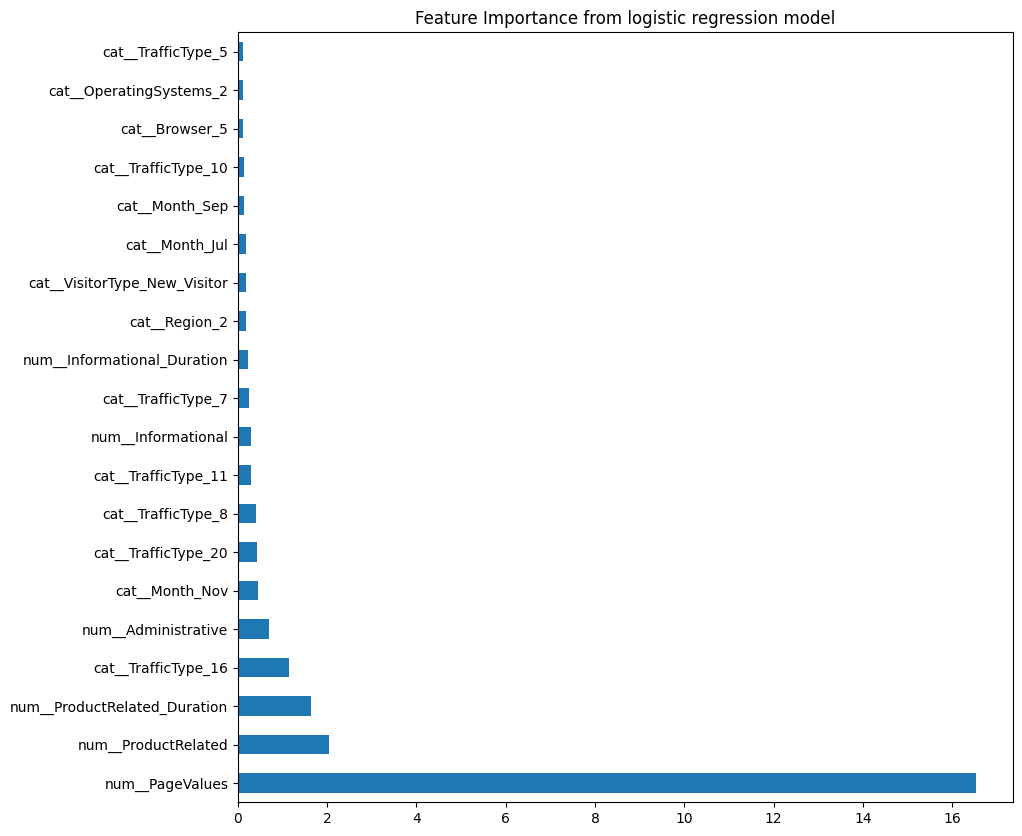

In [30]:
plt.figure(figsize=(10,10))

importance = model.named_steps['model'].coef_
feat_importances = pd.Series([i for sublist in importance for i in sublist], index=model[:-1].get_feature_names_out())
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance from logistic regression model')
plt.show()

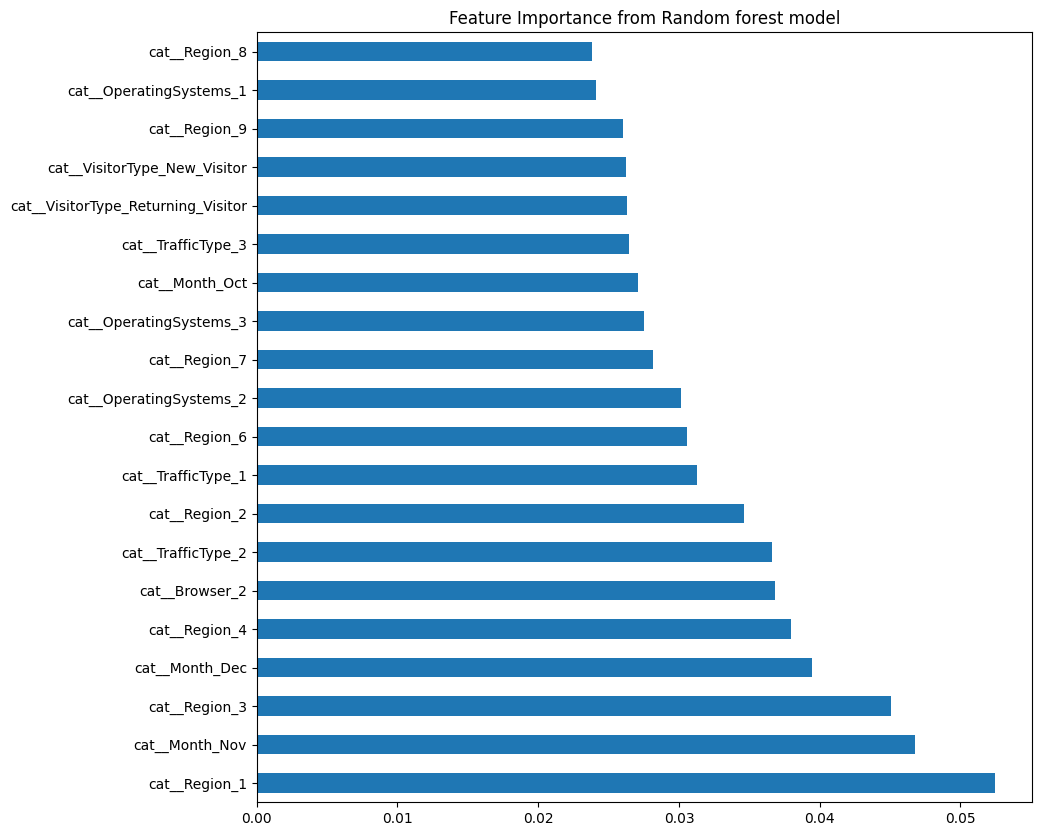

In [31]:
plt.figure(figsize=(10,10))

importance = model3.steps[1][1].feature_importances_
feat_importances = pd.Series(importance, index=model3[:-1].get_feature_names_out())
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance from Random forest model')
plt.show()

According to the more robust logistic regression model's feature importance plot, PageValues is the most important predictor for revenue generation followed by
ProductRelated, ProductRelated_Duration, Administrative, Month_Nov & certain Traffic types.

#Task 2. Customer Segmentation
Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.
Before proceeding with clustering, lets reduce the number of dimensions using Factorial Analysis of Mixed Data (FAMD)
But this needs the number of clusters to be defined, so running elbow curve using kmeans- so convert categorical to get dummy variables

In [32]:
from sklearn.cluster import KMeans

def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeanModel = KMeans(n_clusters=k, random_state=10).fit(X)
        inertias.append(kmeanModel.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')
    plt.show()

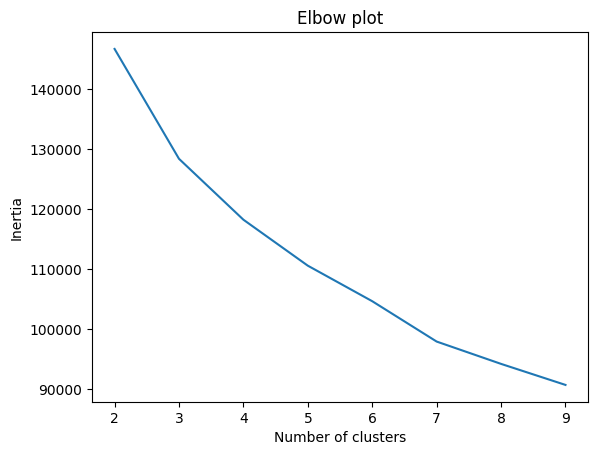

For n_clusters = 2 The average silhouette_score is : 0.3051674589820182


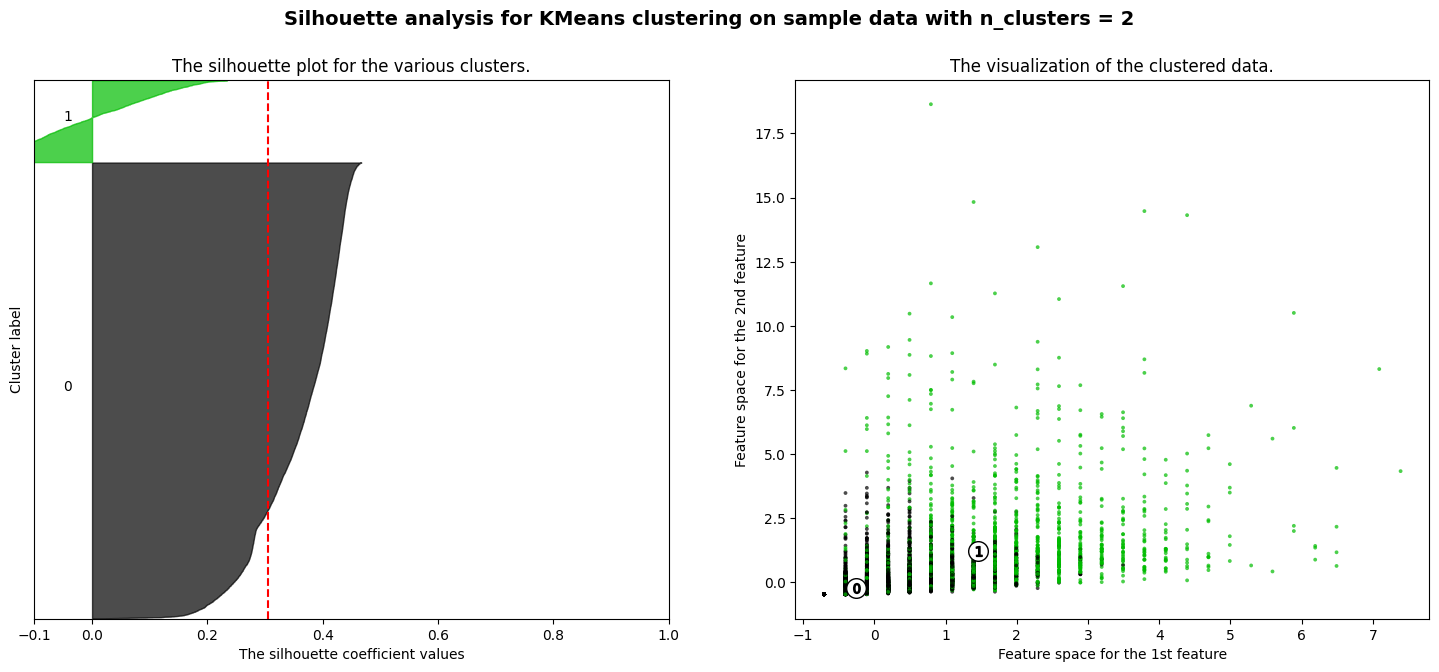

For n_clusters = 3 The average silhouette_score is : 0.29792080094019907


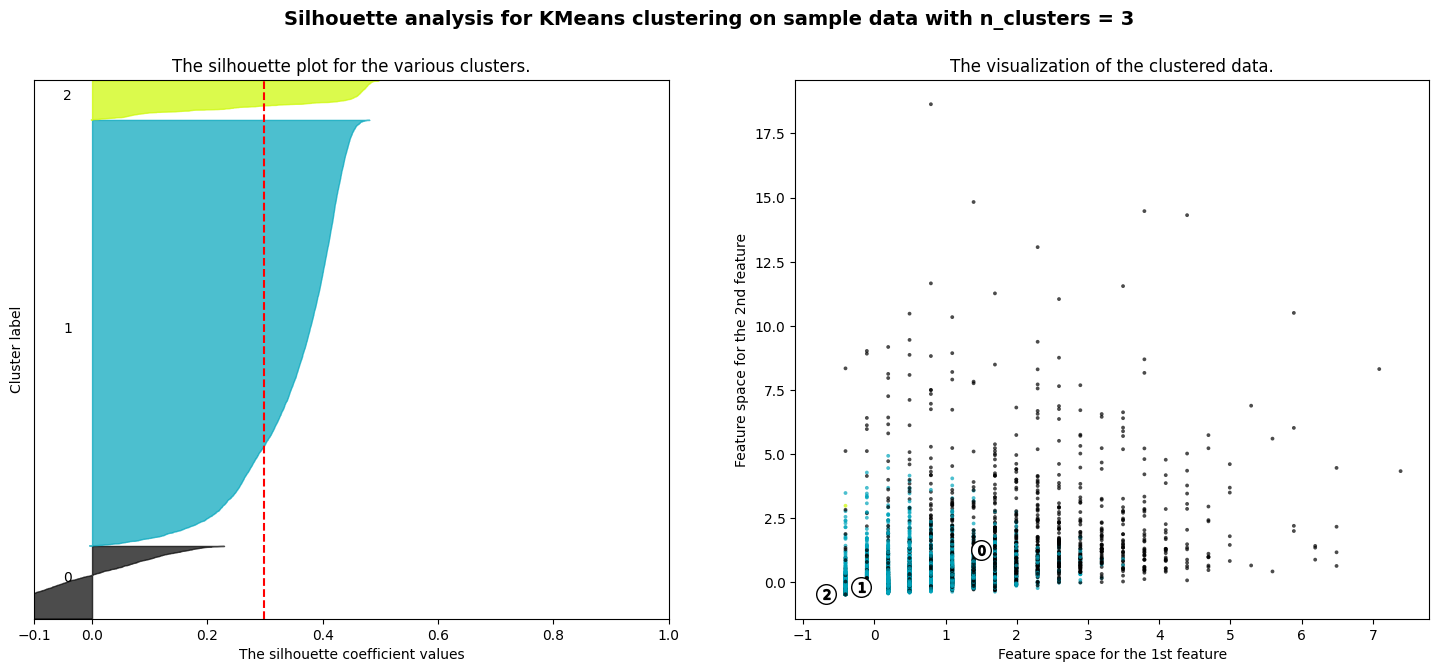

For n_clusters = 4 The average silhouette_score is : 0.2418793069098648


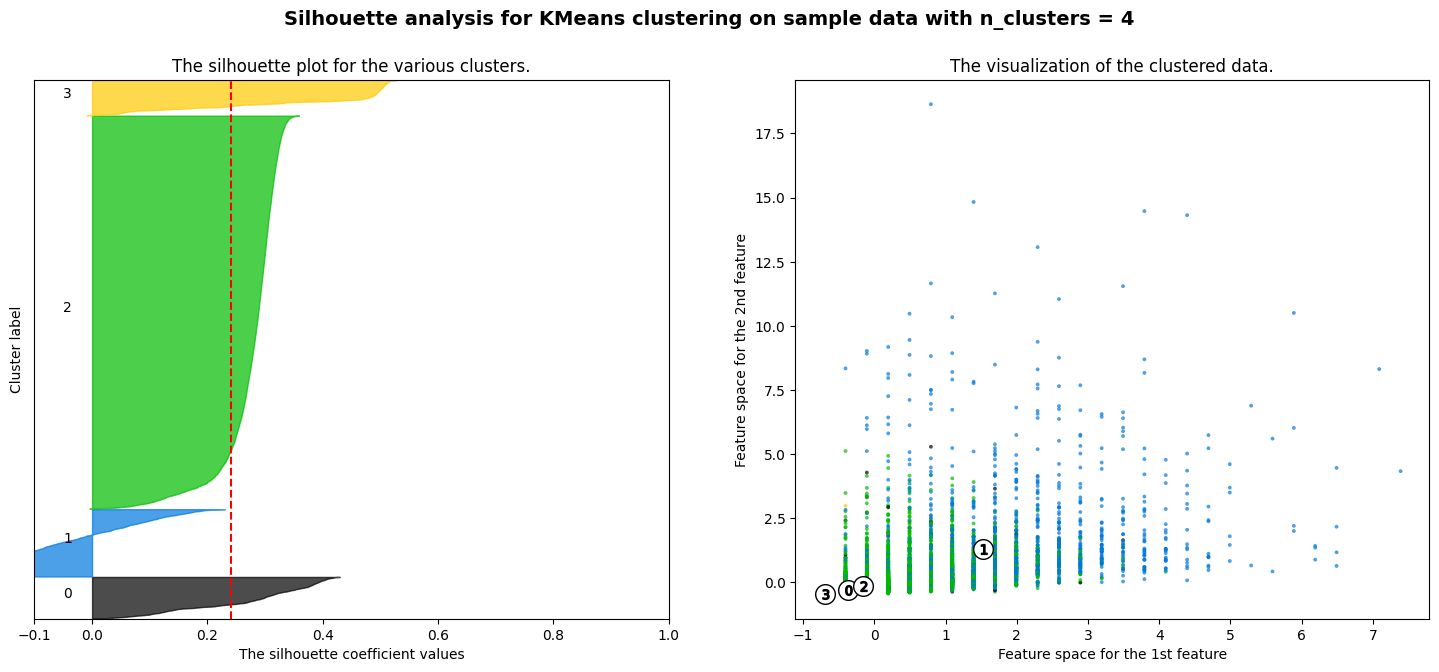

For n_clusters = 5 The average silhouette_score is : 0.21130258897262205


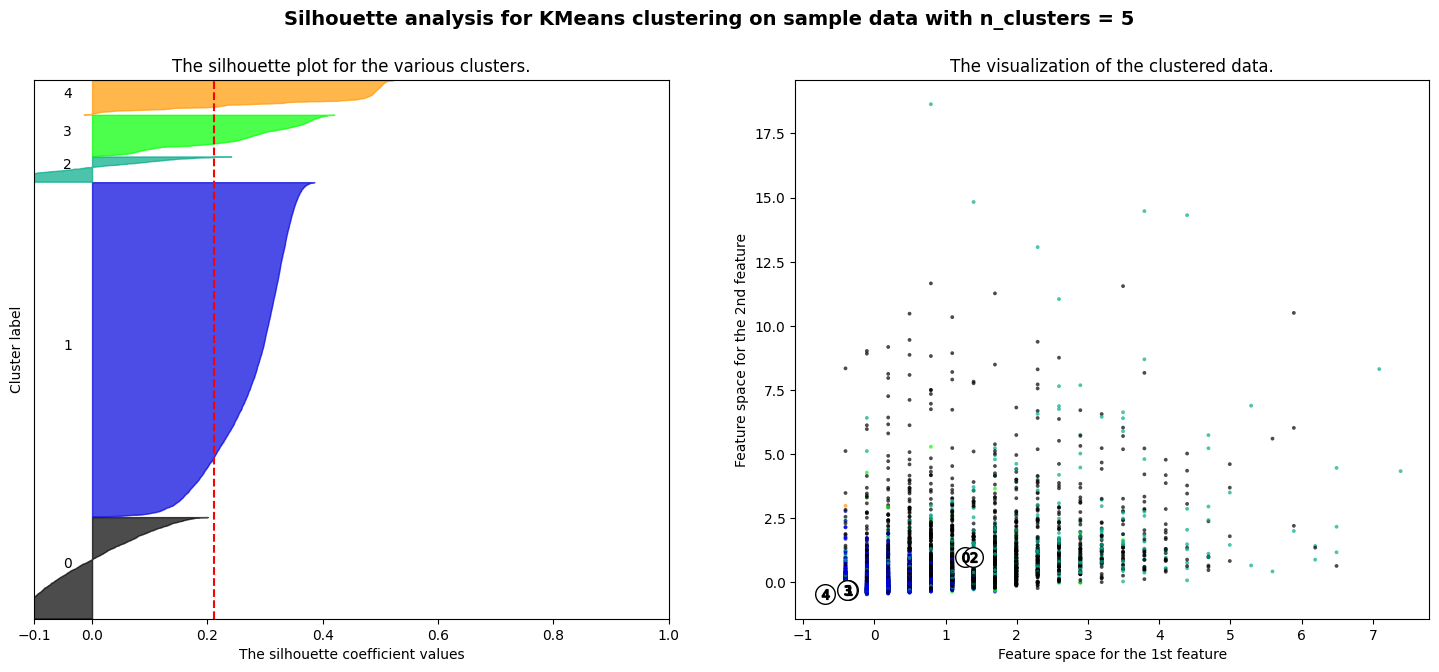

For n_clusters = 6 The average silhouette_score is : 0.21079424385026976


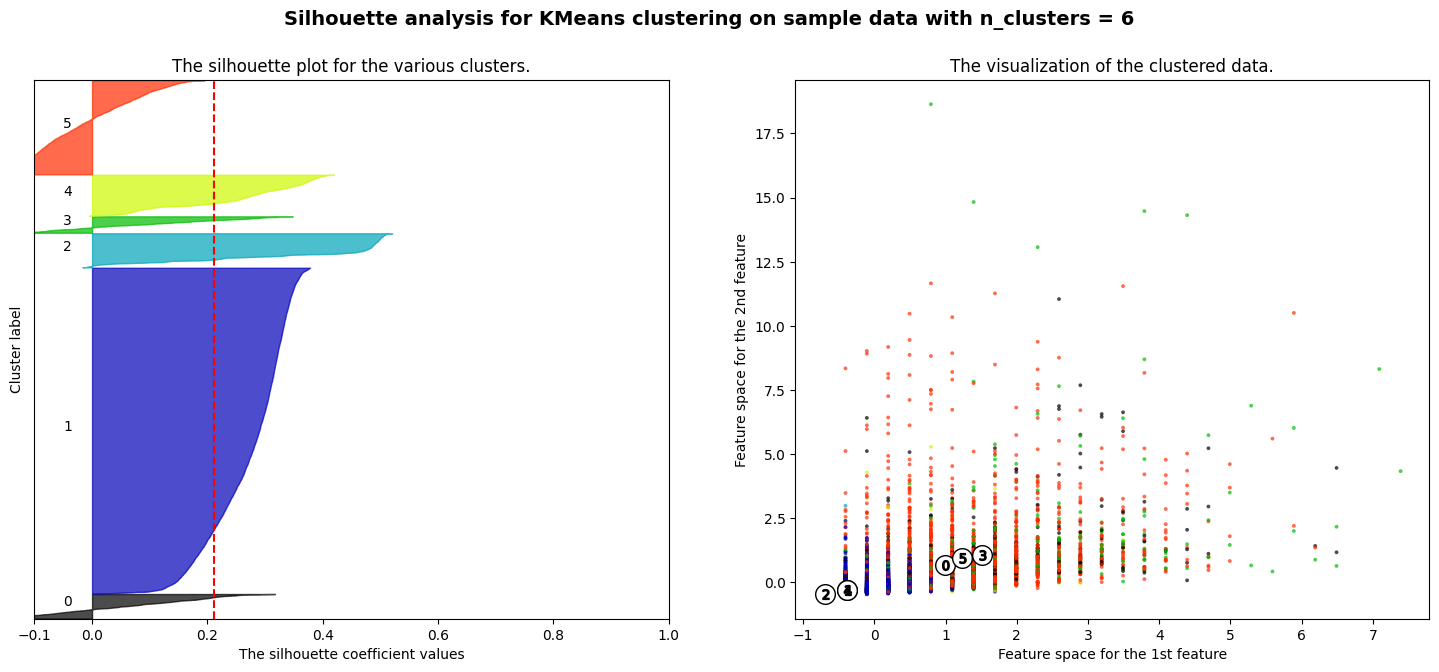

For n_clusters = 7 The average silhouette_score is : 0.20872711790100493


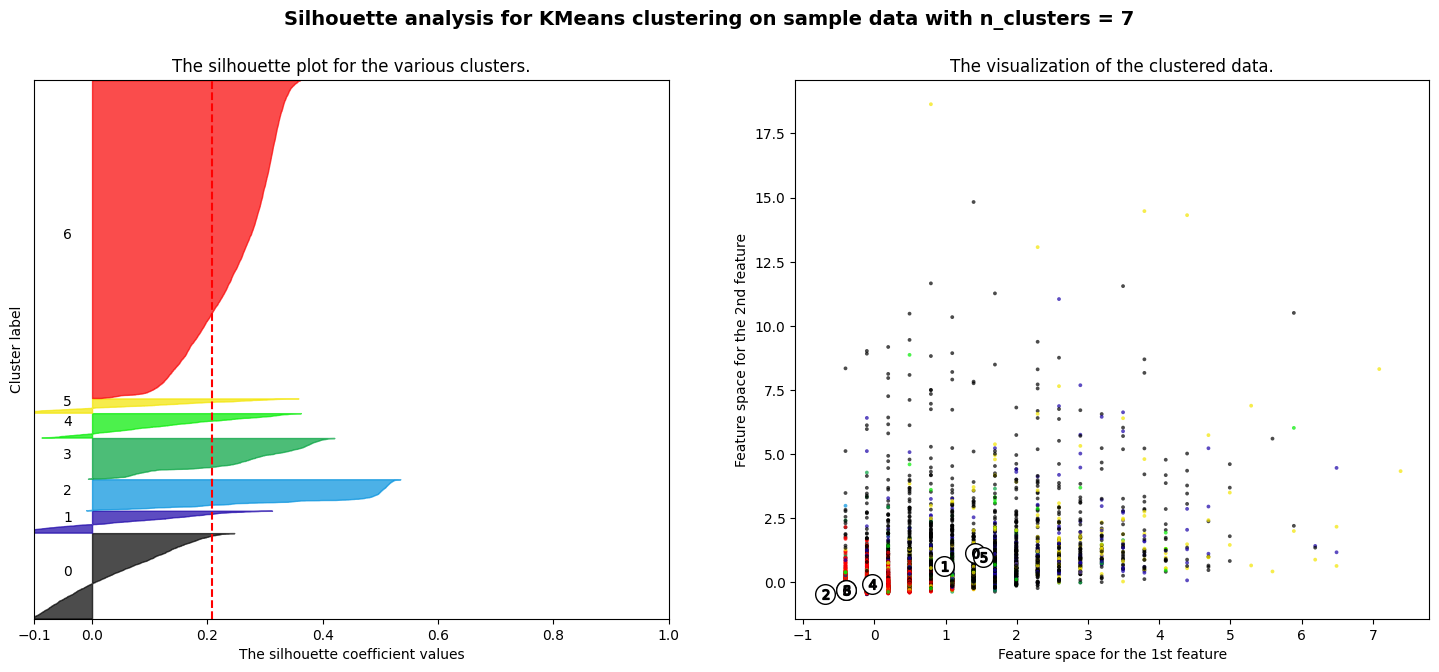

For n_clusters = 8 The average silhouette_score is : 0.12604529242008178


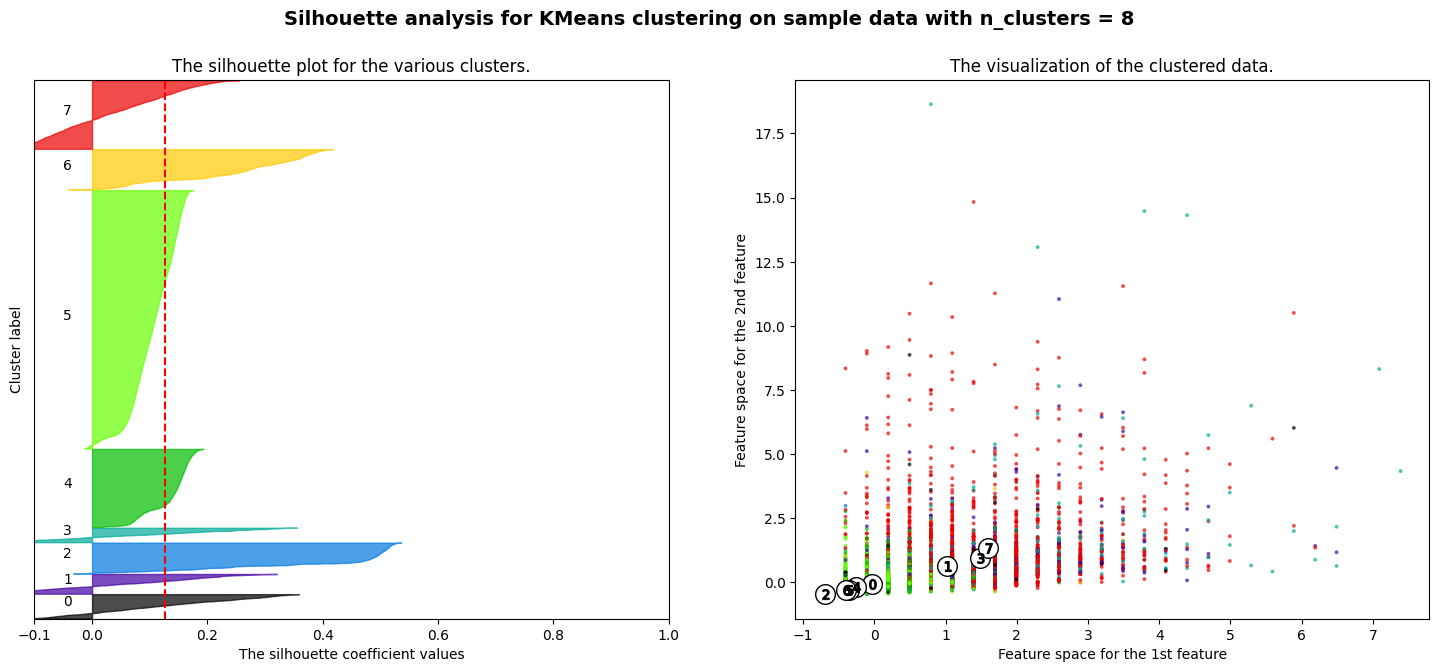

In [34]:
X = dat.copy()
from sklearn.preprocessing import StandardScaler
#numeric_features = ['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','PageValues']
X[numeric_features] = StandardScaler().fit_transform(X[numeric_features])

categoric_features = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']

#tweak the low volume counts into other
v = X.Browser.value_counts() <100
X.Browser = X.Browser.astype('category')
X.Browser = X.Browser.cat.add_categories('99')
X.loc[X.Browser.isin(v.index[v]), 'Browser'] = '99'
X.Browser.value_counts()

v = X.OperatingSystems.value_counts() <100
X.OperatingSystems = X.OperatingSystems.astype('category')
X.OperatingSystems = X.OperatingSystems.cat.add_categories('99')
X.loc[X.OperatingSystems.isin(v.index[v]), 'OperatingSystems'] = '99'
X.OperatingSystems.value_counts()

v = X.TrafficType.value_counts() <300
X.TrafficType = X.TrafficType.cat.add_categories('99')
X.loc[X.TrafficType.isin(v.index[v]), 'TrafficType'] = '99'
X.OperatingSystems.value_counts()

X_cat = pd.get_dummies(X[categoric_features])

# Merge DataFrames
processed_df = pd.concat([X[numeric_features], X_cat], axis=1)

ks = range(2,10)
visualize_elbow(processed_df,ks)

from utils2 import visualize_silhouette
visualize_silhouette(8, processed_df, random_state=10)

In [35]:
plt.show()

The above plot shows anywhere between 7-9 as ideal number of clusters while silhouette score indicates no reasonably strong cluster structures have been identified -silhouette scores <0.38

In [36]:
X_new= pd.concat([dat[numeric_features], X[categoric_features]], axis=1)
y = dat.Revenue

import prince

X_new[numeric_features] = StandardScaler().fit_transform(X_new[numeric_features])
#converting categorical featres to 'object'
for x in X_new.select_dtypes( exclude='float').columns:
    X_new[x] = X_new[x].astype('object')

/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12,

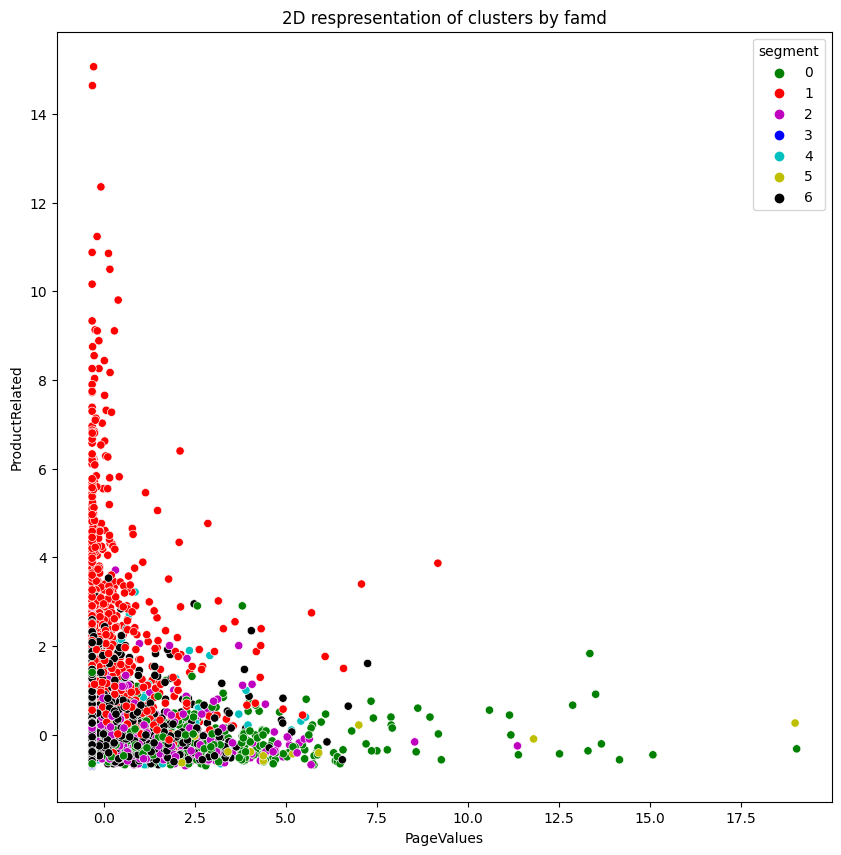

In [37]:
from sklearn.cluster import KMeans

famd = prince.FAMD(n_components=7, n_iter=5, copy=True, check_input=True, engine='auto',random_state=42)
famd = famd.fit(X_new)
coords = famd.row_coordinates(X_new)
model = KMeans(n_clusters=7, random_state=42).fit(coords)
#X['segment'] = model.labels_
X_new.loc[:, 'segment'] = model.labels_

x_axis = X_new['PageValues']
y_axis= X_new['ProductRelated']
plt.figure(figsize=(10,10))
sns.scatterplot(x_axis, y_axis, hue=X_new['segment'], palette = ['g','r','m','b','c','y','k'])
plt.title('2D respresentation of clusters by famd')
plt.show()

/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


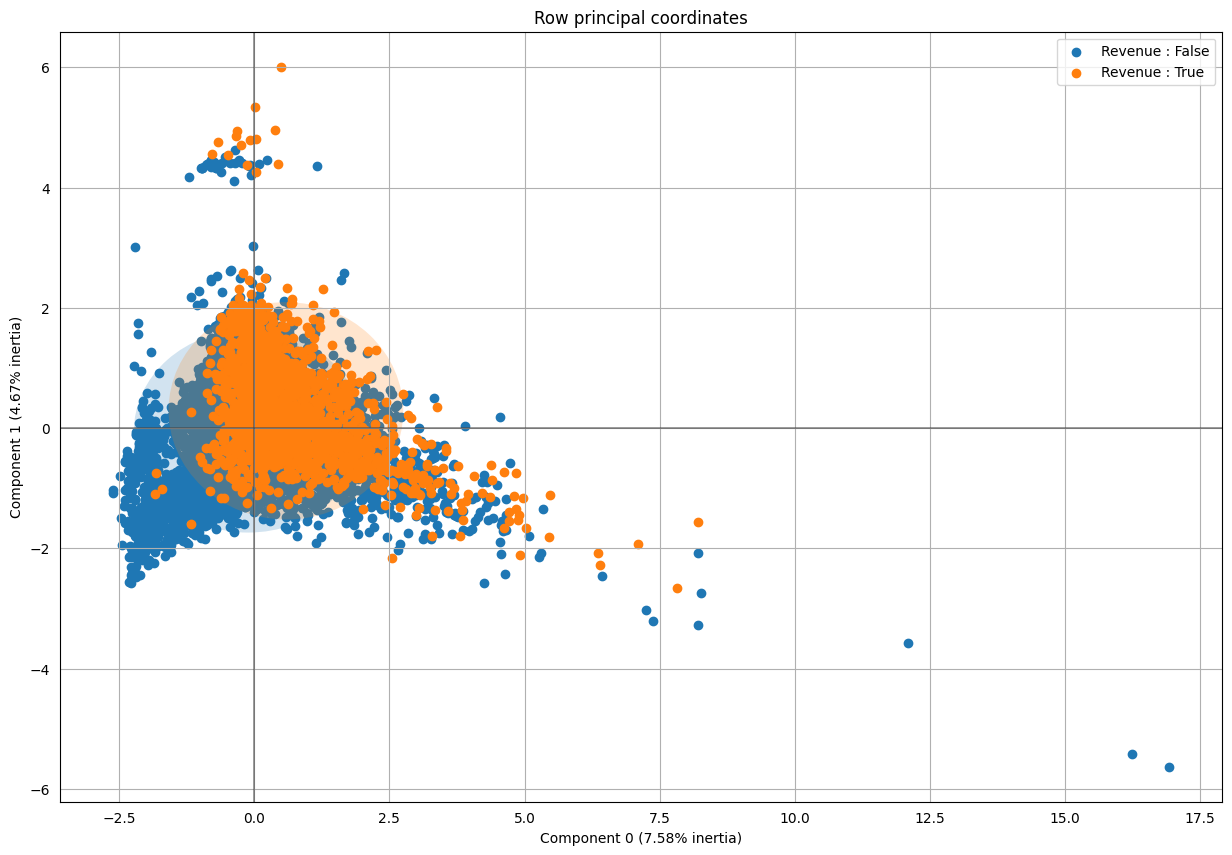

In [38]:
#plt.figure(figsize=(10,8))
famd.transform(X_new)
famd.plot_row_coordinates(X_new,figsize=(15, 10),color_labels=['Revenue : {}'.format(t) for t in dat['Revenue']] )
plt.show()


In [39]:
#size of each cluster

X_new.segment.value_counts()

6    4394
2    2230
4    1912
0    1659
1    1109
3     768
5      57
Name: segment, dtype: int64

Clusters 3 & 5 are on the smaller side. Re-running with smaller number of clusters

/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/sbezawada/.virtualenvs/midterm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12,

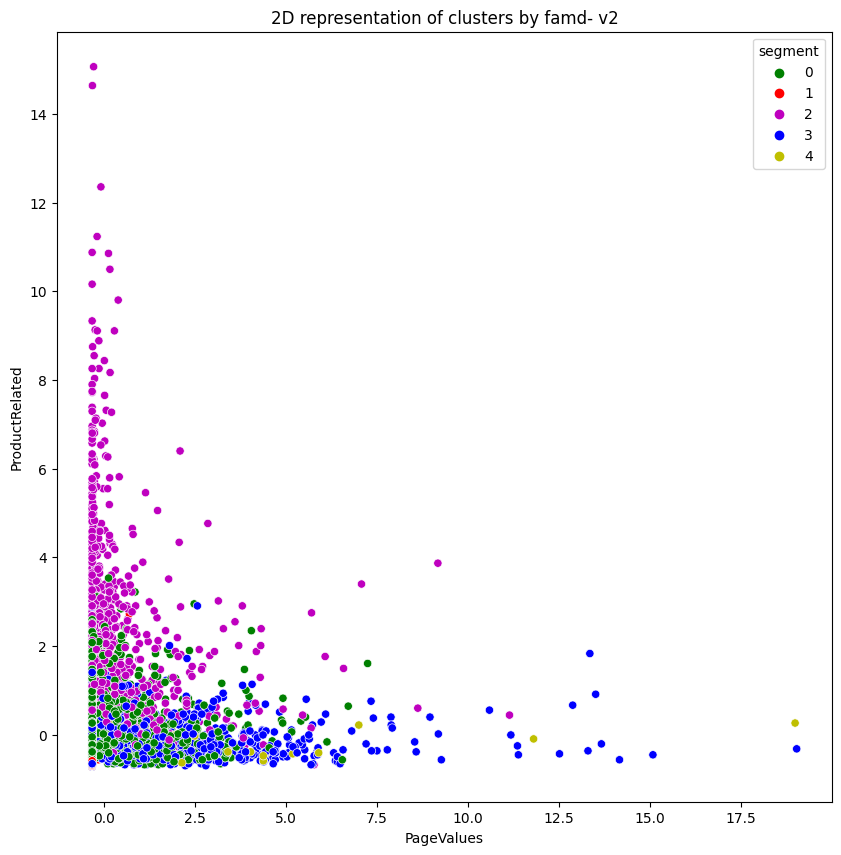

In [40]:
famd = prince.FAMD(n_components=5, n_iter=5, copy=True, check_input=True, engine='auto',random_state=42)
famd = famd.fit(X_new)
coords = famd.row_coordinates(X_new)
model = KMeans(n_clusters=5, random_state=42).fit(coords)
#X['segment'] = model.labels_
X_new.loc[:, 'segment'] = model.labels_

x_axis = X_new['PageValues']
y_axis= X_new['ProductRelated']
plt.figure(figsize=(10,10))
sns.scatterplot(x_axis, y_axis, hue=X_new['segment'], palette = ['g','r','m','b','y'])
plt.title('2D representation of clusters by famd- v2')
plt.show()

In [41]:
X_new.segment.value_counts()

0    5108
3    3721
1    1976
2    1267
4      57
Name: segment, dtype: int64

In [42]:
#saving cluster characteristics to csv file to explore further
X_new.groupby('segment').describe().to_csv('stats2.csv', index=False)

Of the 5 clusters,
Cluster 1: About 22% of data- this cohort has the least values for Page Value (min * max per cohort)- the most important predictor for Revenue generation and are more engaged earlier in the year (May), predominantly operating system 3, Browser 2 and are returning customers. Indicates efforts should be taken towards driving retention than new customer conversions and this cohort nearly makes up a quarter of data and hardly spend time on website.
Cluster 2: About 21% of data - similar to cluster 1 - on lower spectrun for Page values (comparable to cluster1 but primarily from Operating system 1 and Browser 1, with 42% of customers from Region 1. Again highlights the need to focus on retention vs customer acquisition.
Cluster 3: About 11% of data - engage in Administrative and Informational pages
Cluster 5: smallest of lot (0.5% of data) with relatively higher values of PageValues (highest indicator of revenue generation) with specialDay's min and max values being 0. They are the 'day off' special event shoppers, predominantly December shoppers, Operating System -8.


In [47]:
categoric_features = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']

#X.groupby(['segment','Month']).size().reset_index(name='count')
a = X_new.groupby(['segment'])["Month"].value_counts(normalize=True).mul(100).unstack("Month").fillna(0)
b = X_new.groupby(['segment'])["OperatingSystems"].value_counts(normalize=True).mul(100).unstack("OperatingSystems").fillna(0)
c = X_new.groupby(['segment'])["Browser"].value_counts(normalize=True).mul(100).unstack("Browser").fillna(0)
d = X_new.groupby(['segment'])["Region"].value_counts(normalize=True).mul(100).unstack("Region").fillna(0)
e = X_new.groupby(['segment'])["TrafficType"].value_counts(normalize=True).mul(100).unstack("TrafficType").fillna(0)
f = X_new.groupby(['segment'])["VisitorType"].value_counts(normalize=True).mul(100).unstack("VisitorType").fillna(0)
g = X_new.groupby(['segment'])["Weekend"].value_counts(normalize=True).mul(100).unstack("Weekend").fillna(0)

In [48]:
dfs =[a,b,c,d,e,f,g]
import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='segment'), dfs)

/var/folders/mt/52sww7c50ws851nqq95j74qc0000gp/T/ipykernel_53540/992300412.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'3_x', '4_x', '2_x', '1_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='segment'), dfs)


In [49]:
df_final.to_csv('categ.csv',index=False)